# Question1

In [131]:
from selenium import webdriver
driver=webdriver.Chrome(executable_path='chromedriver')
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException
from datetime import date
import time
import operator
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
driver.get('https://www.instagram.com/')
wait=WebDriverWait(driver, 5)
username=wait.until(EC.presence_of_element_located((By.XPATH,'//input[@name = "username"]')))
username.send_keys('Username')
password=wait.until(EC.presence_of_element_located((By.XPATH,'//input[@name = "password"]')))
password.send_keys('Pass')
button=wait.until(EC.presence_of_element_located((By.XPATH,'//button[@class = "sqdOP  L3NKy   y3zKF     "]')))
button.click()
search=wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class = "pbgfb Di7vw "]')))
search.click()

In [148]:
def Search(pagename):
    l=[]
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(pagename)
    time.sleep(3)

    names = driver.find_elements_by_class_name('yCE8d  ')
    for i in names:
        if i.text.startswith('#'):
            continue
        if ("explore/tags" not in str(i.get_attribute("href"))) and "explore/locations" not in str(i.get_attribute("href")):
            l.append(i.get_attribute("href"))
    return l


x=Search('food')[:10]
dic={}
final=[]
global foll
for i in x:
    try:
        driver.get(i)
        time.sleep(4)
        name=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/div[1]/h2').text
        foll=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span').get_attribute('title').replace(',', '')
        final.append([int(foll), name, i])
    except StaleElementReferenceException:
        continue
final.sort(reverse=True)
# print(d)
final=final[:5]
# final=[]
for i in final:
    print(i[1], i[0]) 

foodys 8984875
dilsefoodie 658165
foodtalkindia 302788
thisisdelhi 164685
delhifoodwalks 127180


In [40]:
today =str(date.today())
def Search(pagename):
    l=[]
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(pagename)
    time.sleep(3)

    names = driver.find_elements_by_class_name('Ap253')
    return names[0]

count=0;
count_posts=[]
for i in final:
    driver.get(i[2])
    current=driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script("window.scrollTo(0,arguments[0]);",current)
    time.sleep(4)
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')
    for post in posts:                ## loop to move through each post
        
        post.click()
        time.sleep(6)
                                       ## finding time tag of the post after clicking the post
        
        date=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/div[2]/a/time')
                             
                                          ## getting date from time tag
        
        post_date=date.get_attribute("datetime")[:10]
        
                                         ## taking decisions to decide for previous 3 days
        
        if int(today[:4])==int(post_date[:4]) and int(today[5:7])==int(post_date[5:7]):
            
            if(int(today[8:10])-int(post_date[8:10])<=3):

                count+=1
            
            else:
                count_posts.append([count,i[1]])
                break
        
         ### finding close button
        
        close=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
        close.click()
        time.sleep(3)

            
for row in count_posts:
    print(row[1]," ",row[0])

driver.get("https://www.instagram.com/")


foodys   11
dilsefoodie   14
foodtalkindia   17
thisisdelhi   21
delhifoodwalks   25


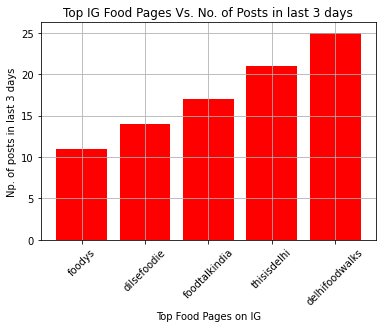

In [46]:
count_posts=np.array(count_posts)

Y=np.array(count_posts[:,0],dtype=int)

X=count_posts[:,1]
plt.xlabel("Top Food Pages on IG")

plt.ylabel("Np. of posts in last 3 days")

plt.title("Top IG Food Pages Vs. No. of Posts in last 3 days")
plt.xticks(rotation=45)
plt.bar(X,Y, color='Red')
plt.grid()
plt.show()
driver.get("https://www.instagram.com/")

# Question2

In [109]:
def Search(pagename):
    l=[]
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(pagename)
    time.sleep(3)

    names = driver.find_elements_by_class_name('Ap253')
    return names[0]

count=0;
words=np.array([])
for i in final:
    driver.get(i[2])
    current=driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script("window.scrollTo(0,arguments[0]);",current)
    time.sleep(4)
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')[:10]
    for post in posts:                ## loop to move through each post
        
        post.click()
        time.sleep(6)
        try:
            hashtags=driver.find_elements_by_class_name("xil3i")
        except NoSuchElementException:
            pass
        
        for hashtag in hashtags:
            if hashtag.text=='':
                continue
            words=np.append(words, hashtag.text) 
        
        try:
            close=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
        except NoSuchElementException:
            close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        time.sleep(1)

for i in words:
    print(i)
    
driver.get("https://www.instagram.com/")

#foodys
#foodys
#icecream
#foodys
#foodys
#chocolate
#dilsefoodie
#dilsefoodie
#dilsefoodie
#dilsefoodie
#dilsefoodie
#dilsefoodie
#dilsefoodie
#southdelhi
#gk1
#dilsefoodie
#dilsefoodie
#food
#delhitovrindavan
#Onedaytrip
#dilsefoodie
#GiveawayAlert
#HendricksMidsummer
#HendricksMidsummer
#HendricksGin
#HendricksMidsummer
#HendricksMidsummer
#HendricksGin
#HendricksMidsummer
#HendricksGin
#MeanestMonsterEver
#SamsungM51
#MeanestMonsterEver
#GalaxyM51
#ad
#thisisdelhi
#tasty
#yummyintummy
#foodphotography
#streetfood
#snacks
#yum
#spicy
#mumbaifoodblogger
#grub
#mumbai
#delhifoodblogger
#f52grams
#delhincr
#homemade
#dessert
#india
#indian
#indianfood
#waffle
#breakfast
#nutella
#strawberry
#nutellawaffle
#tasty
#food
#feelit
#thisisdelhi
#sweets
#tasty
#yummyintummy
#video
#foodforlife
#foodphotography
#streetfood
#snacks
#yum
#satisfying
#satisfyingvideos
#mumbaifoodblogger
#grub
#mumbai
#delhifoodblogger
#f52grams
#delhincr
#dessert
#india
#indian
#indianfood
#feelitreelit
#diwalide

In [110]:
(unique, counts) = np.unique(words, return_counts=True)
temp=np.argsort(-counts)
unique=unique[temp]
counts=counts[temp]
for i in range(len(unique)):
    print(unique[i], counts[i])
# print(type(unique))

#walkwithdfw 10
#dilsefoodie 10
#tasty 10
#foodforlife 9
#delhincr 8
#walkwithanubhav 7
#indian 6
#delhifoodblogger 6
#streetfood 6
#f52grams 6
#grub 6
#india 6
#mumbaifoodblogger 6
#mumbai 6
#indianfood 6
#foodphotography 6
#thisisdelhi 6
#snacks 6
#yummyintummy 6
#yum 6
#video 5
#satisfying 5
#rusticflavours 5
#villagefood 5
#dfwtravels 5
#dessert 5
#HendricksMidsummer 5
#spicy 5
#newvideoalert 5
#satisfyingvideos 5
#homemade 5
#breakfast 5
#likeforlike 4
#foodys 4
#HendricksGin 3
#MeanestMonsterEver 3
#ad 3
#sweets 3
#foodtalkindia 3
#GalaxyM51 2
#yumm 2
#food 2
#yummy 2
#momo 2
#DFWInHaryana 2
#mithai 2
#nomnom 2
#foodexplorer 2
#puranidilli 2
#SamsungM51 2
#cheese 2
#delish 2
#lbb 2
#sodelhi 2
#woodfiredoven 1
#streetsofindia 1
#nagalandcuisine 1
#taco 1
#waffle 1
#traditionalfoods 1
#nesara 1
#turkish 1
#middleeasternkebabs 1
#middleeastern 1
#malai 1
#makkikiroti 1
#makhanmalai 1
#makhan 1
#turkishkebabs 1
#newdelhi 1
#streetsofdelhi 1
#streetfoodstories 1
#rabdi 1
#punjabgrill 

In [111]:
import pandas as pd
df = pd.DataFrame({"Frequency" : counts, "Hashtag" : unique})
df.to_csv("submission2.csv", index=False)
df

,Frequency,Hashtag
0,10,#walkwithdfw
1,10,#dilsefoodie
2,10,#tasty
3,9,#foodforlife
4,8,#delhincr
...,...,...
148,1,#festivefood
149,1,#festivaloflight
150,1,#festival
151,1,#goldana


In [112]:
print(unique[0])

#walkwithdfw


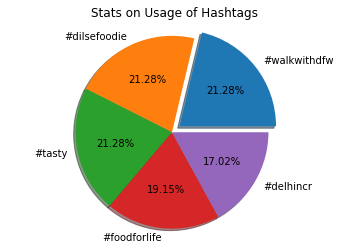

In [113]:
plt.pie(counts[:5],labels=unique[:5],autopct="%.2f%%", explode=[0.1,0,0,0,0],shadow=True)
plt.axis("equal")
plt.title("Stats on Usage of Hashtags")
plt.show()

# Question3

In [155]:
def Search(pagename):
    l=[]
    search = driver.find_element_by_class_name('XTCLo')
    search.send_keys(pagename)
    time.sleep(3)

    names = driver.find_elements_by_class_name('Ap253')
    return names[0]

count=0;
likesTot=np.empty((0,2), int)
# likes_handle=0
for i in final:
    likes_handle=0
    driver.get(i[2])
    current=driver.execute_script("return document.body.scrollHeight;")
    driver.execute_script("window.scrollTo(0,arguments[0]);",current)
    time.sleep(4)
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')[:10]
    for post in posts:                ## loop to move through each post
        
        post.click()
        time.sleep(6)
        try:
            try:
                likes=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/button/span').text
            except NoSuchElementException:
                likes=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/button/span').text
#             print(likes)
            likes=likes.strip().replace(',','')
            likes_handle+=int(likes)
            
        except NoSuchElementException:
            try:
                views=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/span/span')
            except NoSuchElementException:
                views=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/span/span')
            views.click()
            try:
                likes=driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[4]/span').text
            except NoSuchElementException:
                likes=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/div[4]/span').text
            likes=likes.strip().replace(",", '')
            likes_handle+=int(likes)
            try:
                driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[1]').click()
            except NoSuchElementException:
                driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/div[1]').click()
 
        try:
            close=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
        except NoSuchElementException:
            close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        time.sleep(1)
#     print(i[1], likes_handle)
    likesTot=np.append(likesTot, np.array([[i[1], likes_handle]]), axis=0)

for i in likesTot:
    print(i[0], i[1])
    
driver.get("https://www.instagram.com/")

foodys 220639
dilsefoodie 116810
foodtalkindia 4532
thisisdelhi 24122
delhifoodwalks 10860


In [157]:
print('Average likes on a post of each food page:\n')
for i in likesTot:
    print(i[0], int(i[1])//10)

Average likes on a post of each food page:

foodys 22063
dilsefoodie 11681
foodtalkindia 453
thisisdelhi 2412
delhifoodwalks 1086


In [177]:
print('Ratio of Each handle (Followers / Average likes):\n')
ratioarr=np.array([])
for i in range(len(likesTot)):
    followers=int(final[i][0])
    avg=int(likesTot[i][1])//10
    ratio=float(format(followers/avg,".2f"))
    ratioarr=np.append(ratioarr, ratio)
    print(likesTot[i][0], ratio)

Ratio of Each handle (Followers / Average likes):

foodys 407.24
dilsefoodie 56.34
foodtalkindia 668.41
thisisdelhi 68.28
delhifoodwalks 117.11


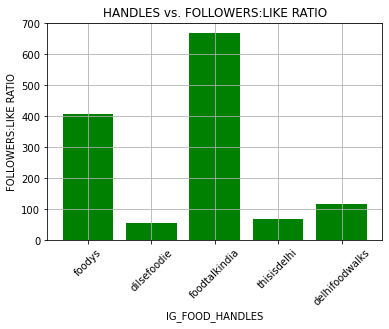

In [179]:
handles=likesTot[:,0]     
plt.bar(handles,ratioarr,color="green")
plt.title("HANDLES vs. FOLLOWERS:LIKE RATIO")
plt.xlabel("IG_FOOD_HANDLES")
plt.ylabel("FOLLOWERS:LIKE RATIO")
plt.xticks(rotation=45)
plt.grid()
plt.show()